## DATA 620 - Week 3 
>### Ahmed Sajjad

## <font color="red">Assignment 3</font>
YouTube link for this assignment can be found here 
https://www.youtube.com/watch?v=dHaK1tj7esM&feature=youtu.be

In [135]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

## <font color="blue">The route datasets for this project is downloaded from http://openflights.org/data.html. The data consists of flight routes of all airlines in the world. For the purpose of this project, I’ve selected some routes that have source and destination in the United States.  </font>

### <font color=red>Step 1: Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges. </font>

In [136]:
routes = pd.read_csv('routesUS.csv', sep=',', header=0)
routes.columns = ("AIRLINE_CODE", 
                  "AIRLINE_ID", 
                  "SOURCE_AIRPORT_CODE", 
                  "SOURCE_AIRPORT_ID", 
                  "DEST_AIRPORT_CODE",
                  "DEST_AIRPORT_ID", 
                  "CODESHARE", 
                  "STOPS", 
                  "EQUIPMENT")

routes = routes[['SOURCE_AIRPORT_CODE', 'DEST_AIRPORT_CODE']]
cities = ['PSP','RNO','RDM','MMH','MRY','STS','SFO','LAX','SAN','SMF','SJC','FAT','EUG','MFR',
          'LAS','EAT','SNA','SEA','PDX','BLI','LGB','BUR','ONT','OAK','GEG','ALW','LWS','PUW']
routes = routes[routes['SOURCE_AIRPORT_CODE'].isin(cities)]
routes.head(10)

,SOURCE_AIRPORT_CODE,DEST_AIRPORT_CODE
0,BUR,PDX
1,BUR,SEA
2,EUG,LAX
3,EUG,PDX
4,FAT,LAX
5,LAS,LAX
6,LAX,EUG
7,LAX,FAT
8,LAX,LAS
9,LAX,MFR


In [137]:
graph = nx.from_pandas_edgelist(routes, source='SOURCE_AIRPORT_CODE', target='DEST_AIRPORT_CODE', edge_attr=True,)
pos = nx.spring_layout(graph, iterations=200)

### <font color="red">Step 2: Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. </font>

In [138]:
# Graph's Diameter
graph_diameter = nx.diameter(graph, e=None)
print ("---------------------------------------------------------------------------------------------------")
print ("Graph Diameter = " + str(graph_diameter))    
print ("---------------------------------------------------------------------------------------------------")
print ("\n")

# Calculate Betweenness Centrality, Degree Centrality and Closeness Centrality
print ("---------------------------------------------------------------------------------------------------")
print ("List of Nodes")
print ("---------------------------------------------------------------------------------------------------")
graph_nodes = list(graph.nodes())
print(graph_nodes)
print ("---------------------------------------------------------------------------------------------------")
print ("\n")
b = nx.betweenness_centrality(graph)
d = nx.degree_centrality(graph)
c = nx.closeness_centrality(graph)

for v in graph_nodes:
    print ("Degree(" + v + ")              = " + str(graph.degree(v)))
    print ("Betweenness(" + v + ")         = " + str(b[v]))
    print ("Degree Centrality(" + v + ")   = " + str(d[v]))
    print ("Closeness Centrality(" + v + ")= " + str(c[v]))
    print ("\n")

---------------------------------------------------------------------------------------------------
Graph Diameter = 3
---------------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------------
List of Nodes
---------------------------------------------------------------------------------------------------
['BUR', 'PDX', 'SEA', 'EUG', 'LAX', 'FAT', 'LAS', 'MFR', 'MMH', 'MRY', 'RDM', 'RNO', 'SAN', 'SFO', 'SJC', 'SMF', 'STS', 'LGB', 'OAK', 'ONT', 'SNA', 'PSP', 'ALW', 'BLI', 'EAT', 'GEG', 'LWS', 'PUW', 'PSC', 'SBA', 'YKM', 'SCK', 'SMX', 'IPL', 'OTH', 'PDT', 'BFL', 'CLD', 'SBP', 'LMT', 'ACV', 'CEC', 'CIC', 'MOD', 'RDD', 'MCE', 'VIS']
---------------------------------------------------------------------------------------------------


Degree(BUR)              = 8
Betweenness(BUR)         = 0.01715634855133217
Degree Centrality(BUR)   = 0.17391304347826086
Closeness 

### <font color="red">Step 3: Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information. </font>

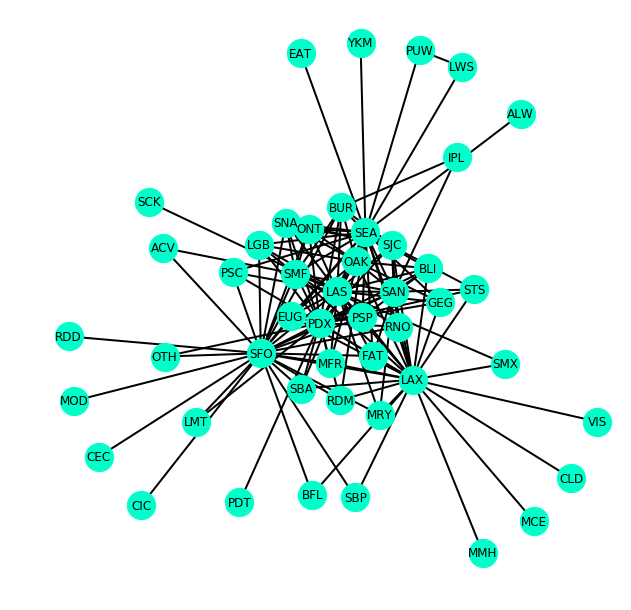

In [139]:
plt.figure(figsize=(8, 8))
nx.draw(graph, pos,
        node_color = '#01FFCC', 
        node_size = 800, 
        node_shape = 'o', 
        width = 2,
        with_labels = True)
plt.axis('equal')
plt.show()

### <font color="red"> Step 4: Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission. </font>

https://www.youtube.com/watch?v=dHaK1tj7esM&feature=youtu.be